**Install python dependencies**

In [ ]:
!pip install -q -r ./dependencies/requirements.txt

**Load python libraries**

In [ ]:
# To get a clearly laid out notebook
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [38]:
X = pd.read_csv('./data/pass_inputs_important.csv')
y = pd.read_csv('./data/pass_label_important.csv')

**Drop Bettings Odds and Position**

In [ ]:
X = X.drop(['odds_win', 'odds_draw', 'odds_lose', 'position_normalized'], axis='columns')

**Split data into test and split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

**Descriptive Analytics**

In [ ]:
X_train.info()

In [ ]:
print(X_train.is_home.value_counts(normalize=True))
X_train.value_counts(X_train['is_home']).plot.bar()

In [ ]:
X_train['weighted_occurences'].describe()

In [ ]:
X_train.hist(figsize=(15,5), column=['weighted_occurences'], bins=[0, 1, 5, 10, 15, 20])
plt.show()

In [ ]:
X_train.value_counts(X_train['team_name_normalized']).sort_index().plot.bar()

In [ ]:
X_train.value_counts(X_train['event_type_normalized']).sort_index().plot.bar()

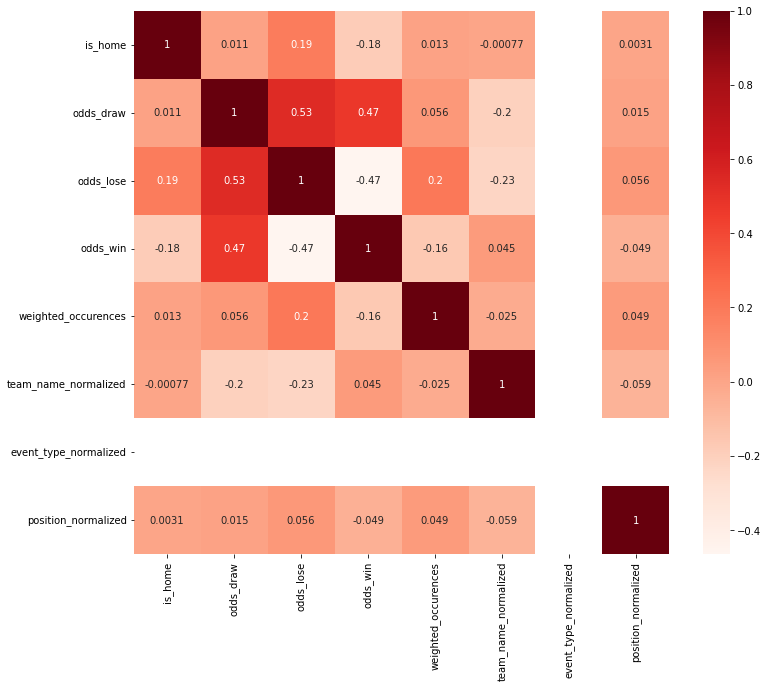

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
y_train.value_counts(normalize=True)

**Create Dummy Classifier**

In [40]:
# Apply cross validation for a dummy model that always chooses the most frequent target feature
dummy = DummyClassifier(strategy='most_frequent')
dm_cv_score = cross_val_score(dummy, X_train, y_train, cv=StratifiedKFold(shuffle=True))
print(dm_cv_score)
print(dm_cv_score.mean())

[0.29097473 0.29097473 0.29169675 0.29097473 0.29097473]
0.29111913357400726


**Apply cross validation for Decision Tree**

In [ ]:
dt = tree.DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt, X_train, y_train, cv=StratifiedKFold(shuffle=True))
print(dt_cv_score)
print(dt_cv_score.mean())

**Auto SKLearn**

In [ ]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier

automl = AutoSklearn2Classifier(time_left_for_this_task = 600, per_run_time_limit = 130)
automl_score = cross_val_score(automl, X_train, y_train, cv=StratifiedKFold(shuffle=True))
print(automl_score)
print(automl_score.mean())

In [41]:
import sklearn
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
automl = AutoSklearn2Classifier(time_left_for_this_task = 600, per_run_time_limit = 130)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))
automl.get_models_with_weights()

[WARNING] [2021-09-21 17:04:21,278:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-09-21 17:04:57,398:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2021-09-21 17:05:18,140:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 3. Number of dummy models: 1
[WARNING] [2021-09-21 17:06:06,417:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 4. Number of dummy models: 1
[WARNING] [2021-09-21 17:06:56,546:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 5. Number of dummy models: 1
[WARNING] [2021-09-21 17:07:11,329:Client-EnsembleBuilder] No models better than random - 

[(1.0,
  MyDummyClassifier(config=1,
                    init_params={'data_preprocessor:feat_type': {'event_type_normalized': 'numerical',
                                                                 'is_home': 'numerical',
                                                                 'odds_draw': 'numerical',
                                                                 'odds_lose': 'numerical',
                                                                 'odds_win': 'numerical',
                                                                 'position_normalized': 'numerical',
                                                                 'team_name_normalized': 'numerical',
                                                                 'weighted_occurences': 'numerical'},
                                 'instance': None},
                    random_state=1))]